In [4]:
import requests

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [6]:
import json

In [7]:
subscription_key='96acd4bcba7c426695f32080faa0af24'
vision_base_url='https://com-vision34.cognitiveservices.azure.com/vision/v2.0/'

In [8]:
analyze_url = vision_base_url + 'analyze'

In [9]:
image_url = 'https://image.newsis.com/2021/05/06/NISI20210506_0017424388_web.jpg?rnd=20210506210250'

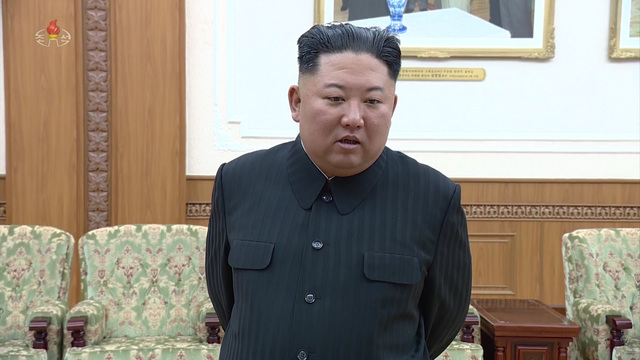

In [10]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [15]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':image_url}

In [16]:
response = requests.post(analyze_url, headers = headers, params = params, json = data)

In [17]:
analysis = response.json()

In [18]:
analysis

{'categories': [{'name': 'people_',
   'score': 0.90625,
   'detail': {'celebrities': [{'name': 'Kim Jong-un',
      'confidence': 0.9723427295684814,
      'faceRectangle': {'left': 309,
       'top': 78,
       'width': 85,
       'height': 85}}]}}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'Brown',
  'dominantColors': ['White', 'Brown', 'Black'],
  'accentColor': '4E7D69',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['person',
   'indoor',
   'man',
   'window',
   'standing',
   'front',
   'table',
   'holding',
   'posing',
   'food',
   'woman',
   'wearing',
   'cake',
   'young',
   'room',
   'computer',
   'shirt',
   'living',
   'kitchen'],
  'captions': [{'text': 'Kim Jong-un standing in front of a window',
    'confidence': 0.9034721157870776}]},
 'requestId': '4c2f215b-a8d9-437c-a2b5-e57073e5c2c8',
 'metadata': {'height': 360, 'width': 640, 'format': 'Jpeg'}}

In [19]:
image_caption = analysis['description']['captions'][0]['text']

In [20]:
print(image_caption)

Kim Jong-un standing in front of a window


In [32]:
#Object Detection
ojbectDetect_url = vision_base_url + 'detect'

In [38]:
image_url = 'https://th.bing.com/th/id/R3b9be299ad4b19528dddaf4eae24ea05?rik=aiTRYl0vAuiKsg&riu=http%3a%2f%2fwww.yeonsu.info%2fnews%2fphoto%2f202009%2f33739_16342_2851.jpg&ehk=G0naqJ3bd83TJvEbf5%2b6P5g6q6Ibgk3OMGJ%2fDkmk44A%3d&risl=&pid=ImgRaw'

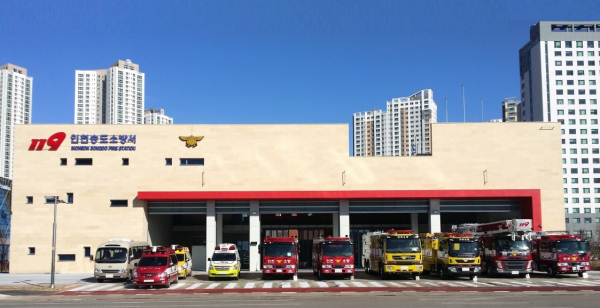

In [39]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [40]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url':image_url}

In [41]:
response = requests.post(ojbectDetect_url, headers = headers, params = params, json = data)

In [42]:
detectResult = response.json()
detectResult

{'objects': [{'rectangle': {'x': 125, 'y': 249, 'w': 50, 'h': 37},
   'object': 'Land vehicle',
   'confidence': 0.523,
   'parent': {'object': 'Vehicle', 'confidence': 0.523}},
  {'rectangle': {'x': 210, 'y': 247, 'w': 32, 'h': 30},
   'object': 'car',
   'confidence': 0.511,
   'parent': {'object': 'Land vehicle',
    'confidence': 0.613,
    'parent': {'object': 'Vehicle', 'confidence': 0.613}}},
  {'rectangle': {'x': 262, 'y': 241, 'w': 34, 'h': 35},
   'object': 'car',
   'confidence': 0.51,
   'parent': {'object': 'Land vehicle',
    'confidence': 0.675,
    'parent': {'object': 'Vehicle', 'confidence': 0.676}}},
  {'rectangle': {'x': 316, 'y': 240, 'w': 36, 'h': 36},
   'object': 'Land vehicle',
   'confidence': 0.607,
   'parent': {'object': 'Vehicle', 'confidence': 0.607}},
  {'rectangle': {'x': 373, 'y': 234, 'w': 48, 'h': 42},
   'object': 'Land vehicle',
   'confidence': 0.583,
   'parent': {'object': 'Vehicle', 'confidence': 0.584}},
  {'rectangle': {'x': 67, 'y': 63, 'w':

In [51]:
from PIL import Image, ImageDraw, ImageFont 

In [53]:
draw = ImageDraw.Draw(image)

In [62]:
def CreateImage(detectResult):
    
    objects = detectResult['objects']
    
    for obj in objects:
        print(obj)
        
        rect = obj['rectangle']
        x = rect['x']
        y = rect['y']
        w = rect['w']
        h = rect['h']
        
        draw.rectangle(((x, y), (x + w, y + h)), outline = 'red')

In [65]:
CreateImage(detectResult)

{'rectangle': {'x': 125, 'y': 249, 'w': 50, 'h': 37}, 'object': 'Land vehicle', 'confidence': 0.523, 'parent': {'object': 'Vehicle', 'confidence': 0.523}}
{'rectangle': {'x': 210, 'y': 247, 'w': 32, 'h': 30}, 'object': 'car', 'confidence': 0.511, 'parent': {'object': 'Land vehicle', 'confidence': 0.613, 'parent': {'object': 'Vehicle', 'confidence': 0.613}}}
{'rectangle': {'x': 262, 'y': 241, 'w': 34, 'h': 35}, 'object': 'car', 'confidence': 0.51, 'parent': {'object': 'Land vehicle', 'confidence': 0.675, 'parent': {'object': 'Vehicle', 'confidence': 0.676}}}
{'rectangle': {'x': 316, 'y': 240, 'w': 36, 'h': 36}, 'object': 'Land vehicle', 'confidence': 0.607, 'parent': {'object': 'Vehicle', 'confidence': 0.607}}
{'rectangle': {'x': 373, 'y': 234, 'w': 48, 'h': 42}, 'object': 'Land vehicle', 'confidence': 0.583, 'parent': {'object': 'Vehicle', 'confidence': 0.584}}
{'rectangle': {'x': 67, 'y': 63, 'w': 86, 'h': 62}, 'object': 'skyscraper', 'confidence': 0.511, 'parent': {'object': 'buildin

In [67]:
image.show()